<a href="https://colab.research.google.com/github/mkatouda/stage3/blob/main/stage3_tutorial_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STaGE3チュートリアル**

本チュートリアルは[STaGE3](https://github.com/mkatouda/stage3)を用いてタンパク質-リガンドドッキングシミュレーションとGromacs MDシミュレーション入力ファイル作成を行う手順を解説している。本チュートリアルはGoogle Colaboratoryで実行可能である。STaGE3を使用する前にはぜひ動作させて結果を確認してほしい。

参考: 
*   [STaGE3 README](https://github.com/mkatouda/stage3#readme)
*   [gmxplaチュートリアル](https://github.com/mkatouda/gmxpla/blob/main/gmxpla_tutorial_jp.ipynb)

# インストール

## miniconda実行環境のインストール

In [1]:
import os
os.environ['PYTHONPATH'] = ''
!curl -sSL https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -o /tmp/miniconda.sh
!bash /tmp/miniconda.sh -bfp /opt/miniconda3
os.environ['PATH'] = '/opt/miniconda3/bin:' + os.environ['PATH']
!conda config --add channels conda-forge
!conda update -n base -c defaults conda -y
!conda update -n base -c conda-forge python=3.8 -y

PREFIX=/opt/miniconda3
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py39h7f8727e_0
    - conda==4.12.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.

## 必要なconda-forgeライブラリのインストール

In [2]:
!conda install -c conda-forge pyyaml numpy pandas ambertools acpype openbabel gromacs -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - acpype
    - ambertools
    - gromacs
    - numpy
    - openbabel
    - pandas
    - pyyaml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    acpype-2022.7.21           |     pyhd8ed1ab_0         4.9 MB  conda-forge
    ambertools-22.0            |   py

## STaGE3のインストール

[STaGE3](https://github.com/mkatouda/stage3)をgithubレポジトリからインストールする。




In [3]:
!pip install git+https://github.com/mkatouda/stage3.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/stage3.git to /tmp/pip-req-build-by4suuwi
  Running command git clone -q https://github.com/mkatouda/stage3.git /tmp/pip-req-build-by4suuwi
  Created wheel for stage3: filename=stage3-0.1.0-py3-none-any.whl size=353698 sha256=c394bcdd4d6c0587efb426a610104ace7de1ef0cf6054153db4edf15ceb46942
  Stored in directory: /tmp/pip-ephem-wheel-cache-1m7bjfjx/wheels/81/be/2c/e01f09529517d4640361badbfc49f047ac97de91a2a13837e8
Successfully built stage3


## stage3のヘルプの表示

In [4]:
!stage3 -h

usage: stage3 [-h] [-i INP] [-l LIGAND] [-s SMILES] [-o OUTPUT]
              [--ffligand FFLIGAND] [--ffprotein FFPROTEIN] [-x CALIBRATION]
              [-k] [-p PH] [-r] [-q CHARGE_METHOD] [-f CHARGE_MULTIPLIER]
              [-c MERGECOORDINATES] [-t MERGETOPOLOGY] [-b BOX_TYPE]
              [-d BOX_BUFFER] [-w WATER] [--conc CONC] [--pname PNAME]
              [--nname NNAME] [-v]

STaGE is a tool for generating GROMACS topologies
of small molecules for different force fields (currently GAFF, GAFF2,
and CGenFF). It uses many external programs to perform its tasks,
so make sure you read the documentation to properly cite the programs if
you use STaGE in a publication and also cite:
Lundborg M., Lindahl E. Automatic GROMACS Topology Generation and Comparisons
of Force Fields for Solvation Free Energy Calculations. J. Phys. Chem. B. 2014,
DOI: 10.1021/jp505332p

optional arguments:
  -h, --help            show this help message and exit
  -i INP, --inp INP     yaml style input file,

# サンプルジョブ実行

## STaGE3のgithubレポジトリのダウンロード

In [5]:
!git clone https://github.com/mkatouda/stage3.git
%cd stage3/example

Cloning into 'stage3'...
remote: Enumerating objects: 546, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 546 (delta 12), reused 16 (delta 5), pack-reused 515
Receiving objects: 100% (546/546), 866.92 KiB | 7.16 MiB/s, done.
Resolving deltas: 100% (293/293), done.
/content/stage3/example


## サンプル入力ファイルの確認

サンプル入力ファイルinput.ymlにplacingmdの入力キーワード(キーワードとその説明はplacingmd -hで確認可能)をyaml形式で記載して与えることができる。

In [6]:
!ls ./inputs
!cat ./inputs/input.yml

3HTB_protein.pdb  input.yml  jz4.mol
ligand: './inputs/jz4.mol'
mergecoordinates: './inputs/3HTB_protein.pdb'
output: '3HTB-jz4-wat'
ffligand: 'gaff2'
ffpritein: 'amber99sb-ildn'
charge_method: 'am1bcc'
water: 'tip3p'
box_type: 'dodecahedron'
box_buff: 1.0
conc: 0.15
pname: 'NA'
nname: 'CL'
verbose: True


## サンプルジョブ実行

In [7]:
!stage3 -i ./inputs/input.yml

======= Input configulations =======
ligand: ./inputs/jz4.mol
mergecoordinates: ./inputs/3HTB_protein.pdb
output: 3HTB-jz4-wat
ffligand: gaff2
ffpritein: amber99sb-ildn
charge_method: am1bcc
water: tip3p
box_type: dodecahedron
box_buff: 1.0
conc: 0.15
pname: NA
nname: CL
verbose: True
inp: ./inputs/input.yml
smiles: None
ffprotein: None
calibration: None
keep_ligand_name: False
ph: None
retain_charges: False
charge_multiplier: 1.0
mergetopology: None
box_buffer: 1.0
proteinCoords:  /content/stage3/example/inputs/3HTB_protein.pdb
converters: [<stage3.GaffForceFieldPlugin.GaffForceFieldPlugin object at 0x7ff0c453fa90>]
iBase:  ./inputs/jz4 iFormat: .mol
inputFile: /content/stage3/example/inputs/jz4.mol
outputFile: /content/stage3/example/3HTB-jz4-wat
obabel -imol /content/stage3/example/inputs/jz4.mol --partialcharge gasteiger -omol2 -O /content/stage3/example/3HTB-jz4-wat.mol2
1 molecule converted

inMolecules: ['/content/stage3/example/3HTB-jz4-wat.mol2']
inMolecule:  /content/stage3/e

## 出力ファイル確認

### Gromacs MD入力ファイル一式の所在確認

In [8]:
!ls ./3HTB-jz4-wat_gaff2

 3HTB-jz4-wat_box.gro		    '#3HTB-jz4-wat.top.2#'
 3HTB-jz4-wat.gro		     3HTB_protein.gro
 3HTB-jz4-wat.itp		     3HTB_protein.itp
 3HTB-jz4-wat_solvated.gro	     3HTB_protein.top
 3HTB-jz4-wat_solvated_ionised.gro   index.ndx
 3HTB-jz4-wat.top		     posre_3HTB-jz4-wat.itp
'#3HTB-jz4-wat.top.1#'		     posre_3HTB_protein.itp


### Gromacs座標ファイル(gro)の確認

In [9]:
!cat ./3HTB-jz4-wat_gaff2/3HTB-jz4-wat_solvated_ionised.gro

ストリーミング出力は最後の 5000 行に切り捨てられました。
 8747SOL    HW128384   6.605   2.052   3.580
 8747SOL    HW228385   6.631   1.891   3.575
 8748SOL     OW28386   6.090   1.912   3.602
 8748SOL    HW128387   6.048   1.855   3.532
 8748SOL    HW228388   6.024   1.981   3.634
 8749SOL     OW28389   6.159   2.732   2.891
 8749SOL    HW128390   6.203   2.821   2.882
 8749SOL    HW228391   6.096   2.732   2.968
 8750SOL     OW28392   6.946   2.724   2.907
 8750SOL    HW128393   6.871   2.724   2.841
 8750SOL    HW228394   6.983   2.632   2.916
 8751SOL     OW28395   6.795   2.387   2.137
 8751SOL    HW128396   6.808   2.303   2.191
 8751SOL    HW228397   6.766   2.461   2.197
 8752SOL     OW28398   5.893   2.075   3.093
 8752SOL    HW128399   5.870   2.112   3.183
 8752SOL    HW228400   5.863   1.980   3.087
 8753SOL     OW28401   5.623   3.172   3.144
 8753SOL    HW128402   5.676   3.123   3.212
 8753SOL    HW228403   5.645   3.270   3.149
 8754SOL     OW28404   6.318   2.496   2.926
 8754SOL    HW128405   

### Gromacsトポロジーファイル(top)の確認

In [10]:
!cat ./3HTB-jz4-wat_gaff2/3HTB-jz4-wat.top

; Topology file generated by GaffForceFieldPlugin.py/.. 2022-10-31 08:53:45.055919

#include "amber99sb-ildn.ff/forcefield.itp"
#include "3HTB-jz4-wat.itp"
#include "amber99sb-ildn.ff/tip3p.itp"
#include "amber99sb-ildn.ff/ions.itp"

#include "3HTB_protein.itp"

[ system ]
3HTB-jz4-wat + LYSOZYME in water

[ molecules ]
; Compound      nmols
3HTB-jz4-wat  1
Protein_chain_A     1
SOL         10226
NA               31
CL               37


### Gromacsインデックスファイル(ndx)の確認

In [11]:
!cat ./3HTB-jz4-wat_gaff2/index.ndx

ストリーミング出力は最後の 5000 行に切り捨てられました。
25212 25213 25214 25215 25216 25217 25218 25219 25220 25221 25222 25223 25224 25225 25226
25227 25228 25229 25230 25231 25232 25233 25234 25235 25236 25237 25238 25239 25240 25241
25242 25243 25244 25245 25246 25247 25248 25249 25250 25251 25252 25253 25254 25255 25256
25257 25258 25259 25260 25261 25262 25263 25264 25265 25266 25267 25268 25269 25270 25271
25272 25273 25274 25275 25276 25277 25278 25279 25280 25281 25282 25283 25284 25285 25286
25287 25288 25289 25290 25291 25292 25293 25294 25295 25296 25297 25298 25299 25300 25301
25302 25303 25304 25305 25306 25307 25308 25309 25310 25311 25312 25313 25314 25315 25316
25317 25318 25319 25320 25321 25322 25323 25324 25325 25326 25327 25328 25329 25330 25331
25332 25333 25334 25335 25336 25337 25338 25339 25340 25341 25342 25343 25344 25345 25346
25347 25348 25349 25350 25351 25352 25353 25354 25355 25356 25357 25358 25359 25360 25361
25362 25363 25364 25365 25366 25367 25368 25369 25370 25371 25372 25

# [参考] Gromacs MDシミュレーション実行

placingmdで生成したGromacs MD入力ファイルを用いて、タンパク質-リガンド複合系のMDシミュレーションを実行する。

## エネルギー極小化実行


In [12]:
%cd ./3HTB-jz4-wat_gaff2
!gmx grompp -f ../mdp_ffamber/em.mdp -c ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -o em.tpr -maxwarn 10
!gmx mdrun -deffnm em

/content/stage3/example/3HTB-jz4-wat_gaff2
                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx grompp -f ../mdp_ffamber/em.mdp -c ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -o em.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/em.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.


NOTE 2 [file ../mdp_ffamber/em.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -430518593

Generated 2556 of the 2556 non-bonded parameter combinations
Generating 1-4 interactions: fudge 

## NVT平衡化MD実行

In [13]:
!gmx grompp -f ../mdp_ffamber/nvt_eq.mdp -c ./em.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -o nvt_eq.tpr -maxwarn 10
!gmx mdrun -deffnm nvt_eq

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx grompp -f ../mdp_ffamber/nvt_eq.mdp -c ./em.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -o nvt_eq.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/nvt_eq.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -570818561

Generated 2556 of the 2556 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2556 of the 2556 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HTB-jz4-wat'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'


## NPT平衡化MD実行

In [14]:
!gmx grompp -f ../mdp_ffamber/npt_eq.mdp -c ./nvt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t nvt_eq.cpt -o npt_eq.tpr -maxwarn 10
!gmx mdrun -deffnm npt_eq

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx grompp -f ../mdp_ffamber/npt_eq.mdp -c ./nvt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t nvt_eq.cpt -o npt_eq.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/npt_eq.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -692230529

Generated 2556 of the 2556 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2556 of the 2556 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HTB-jz4-wat'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 

## NPTプロダクトMD実行

In [15]:
!gmx grompp -f ../mdp_ffamber/npt_prod.mdp -c ./npt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t npt_eq.cpt -o npt_prod.tpr -maxwarn 10
!gmx mdrun -deffnm npt_prod

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx grompp -f ../mdp_ffamber/npt_prod.mdp -c ./npt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t npt_eq.cpt -o npt_prod.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/npt_prod.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -102072337

Generated 2556 of the 2556 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2556 of the 2556 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HTB-jz4-wat'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule

In [16]:
!gmx grompp -f ../mdp_ffamber/ie.mdp -c ./npt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t npt_eq.cpt -o npt_prod_ie.tpr -maxwarn 10
!gmx mdrun -deffnm npt_prod_ie -rerun npt_prod.xtc

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx grompp -f ../mdp_ffamber/ie.mdp -c ./npt_eq.gro -r ./3HTB-jz4-wat_solvated_ionised.gro -p ./3HTB-jz4-wat.top -n ./index.ndx -t npt_eq.cpt -o npt_prod_ie.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/ie.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to 1862224623

Generated 2556 of the 2556 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 2556 of the 2556 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HTB-jz4-wat'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Pr

## NPTプロダクトMD結果解析

NPTプロダクトMDの解析を[gmxpla](https://github.com/mkatouda/gmxpla)を用いて行ってみる。なお、解析には通常のGromacsモジュールやMDAnalysisなど好みのツールを用いてもよい。



### gmxplaのインストール 

In [17]:
!pip install git+https://github.com/mkatouda/gmxpla.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/gmxpla.git to /tmp/pip-req-build-b8f0w9dy
  Running command git clone -q https://github.com/mkatouda/gmxpla.git /tmp/pip-req-build-b8f0w9dy
  Created wheel for gmxpla: filename=gmxpla-0.0.1-py3-none-any.whl size=5268 sha256=5d239b51c04a8ccce1530b99d82c89fedadbc74644b31ef0094316c6af26b288
  Stored in directory: /tmp/pip-ephem-wheel-cache-md3a93q3/wheels/b7/17/7d/92484efb4da98fd6a761661f4ee7e8509cb4b81698f971d761
Successfully built gmxpla


In [18]:
!gmxpla -h

usage: gmxpla [-h] [-i INP] [-e EDR] [-t TPR] [-x XTC] [-n NDX] [-oc OUTCSV]
              [-v]

gromax protein-ligand MD trajectory analysis tools

optional arguments:
  -h, --help            show this help message and exit
  -i INP, --inp INP     yaml style input file, overwriting argument values (default: None)
  -e EDR, --edr EDR     Gromacs energy file (edr file) (default: None)
  -t TPR, --tpr TPR     Gromacs topology file (tpr or gro file) (default: None)
  -x XTC, --xtc XTC     Gromacs trajectory file (xtc file) (default: None)
  -n NDX, --ndx NDX     Gromacs index file (ndx file) (default: None)
  -oc OUTCSV, --outcsv OUTCSV
                        docking score output (csv file) (default: docking_score.csv)
  -v, --verbose         Verbose output. (default: False)


gmxpla入力yamlファイルの作成: gromacs MD計算出力ファイルパスを記載

In [19]:
s = "edr: './npt_prod_ie.edr'\ntpr: './npt_prod.tpr'\nxtc: './npt_prod.xtc'\nndx: './index.ndx'"
with open('input_gmxpla.yml', mode='w') as fout:
  fout.write(s)

In [20]:
!cat ./input_gmxpla.yml

edr: './npt_prod_ie.edr'
tpr: './npt_prod.tpr'
xtc: './npt_prod.xtc'
ndx: './index.ndx'

### gmxpla実行

In [21]:
!gmxpla -i ./input_gmxpla.yml

Namespace(edr=None, inp='./input_gmxpla.yml', ndx=None, outcsv='docking_score.csv', tpr=None, verbose=False, xtc=None)
======= Input configulations =======
edr: ./npt_prod_ie.edr
tpr: ./npt_prod.tpr
xtc: ./npt_prod.xtc
ndx: ./index.ndx
inp: ./input_gmxpla.yml
outcsv: docking_score.csv
verbose: False
echo Coul-SR:Protein-LIG
 LJ-SR:Protein-LIG
 0
 | gmx energy -f ./npt_prod_ie.edr -o npt_prod_ie_ie_component.xvg
                :-) GROMACS - gmx energy, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/stage3/example/3HTB-jz4-wat_gaff2
Command line:
  gmx energy -f ./npt_prod_ie.edr -o npt_prod_ie_ie_component.xvg

Opened ./npt_prod_ie.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bon

In [22]:
!ls -rt

 posre_3HTB_protein.itp		     npt_eq.gro
 3HTB_protein.gro		     npt_eq.edr
 posre_3HTB-jz4-wat.itp		     npt_eq.log
 3HTB-jz4-wat.gro		     npt_prod.tpr
 3HTB-jz4-wat.itp		     npt_prod.cpt
 3HTB_protein.itp		     npt_prod.xtc
 3HTB_protein.top		     npt_prod.gro
'#3HTB-jz4-wat.top.1#'		     npt_prod.edr
 3HTB-jz4-wat_box.gro		     npt_prod.log
 3HTB-jz4-wat_solvated.gro	     mdout.mdp
'#3HTB-jz4-wat.top.2#'		     npt_prod_ie.tpr
 3HTB-jz4-wat.top		     npt_prod_ie.edr
 3HTB-jz4-wat_solvated_ionised.gro   npt_prod_ie.log
 index.ndx			     input_gmxpla.yml
 em.tpr				     npt_prod_ie_ie_component.xvg
 step14b.pdb			     npt_prod_ie_ie_sum.xvg
 step14c.pdb			     npt_prod_ie_ie_sum.csv
 em.edr				     npt_prod_ie_ie_sum.png
 em.trr				     npt_prod_nowat.xtc
 em.gro				     npt_prod_nowat_center.xtc
 em.log				     npt_prod_nowat_fit.xtc
 nvt_eq.tpr			     npt_prod_nowat_fit_start.gro
 nvt_eq.xtc			     npt_prod_nowat_fit_rms.xvg
 nvt_eq.cpt			     npt_prod_nowat_fit_rms.csv
 nvt_eq.gro

相互作用エネルギー出力結果csvファイルの確認

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('./npt_prod_ie_ie_sum.csv')
df

,Time (ps),(kJ/mol)
0,0.0,-107.357201
1,1.0,-125.583549
2,2.0,-122.350693
3,3.0,-114.740219
4,4.0,-111.281509
5,5.0,-119.348618
6,6.0,-112.449181
7,7.0,-121.386406
8,8.0,-133.356720
9,9.0,-119.524460


RMSD出力結果csvファイルの確認

In [25]:
df = pd.read_csv('./npt_prod_nowat_fit_rms.csv')
df

,Time (ps),RMSD (nm)
0,0.0,0.000472
1,1.0,0.069668
2,2.0,0.070285
3,3.0,0.068611
4,4.0,0.065862
5,5.0,0.071225
6,6.0,0.058211
7,7.0,0.078850
8,8.0,0.081198
9,9.0,0.074119


RMSF出力結果csvファイルの確認

In [26]:
df = pd.read_csv('./npt_prod_nowat_fit_rmsf.csv')
df

,Atom,(nm)
0,1.0,0.0193
1,2.0,0.0118
2,3.0,0.0107
3,4.0,0.0106
4,5.0,0.0078
5,6.0,0.0126
6,7.0,0.0112
7,8.0,0.0146
8,9.0,0.0205
9,10.0,0.0148


## MDトラジェクトリ可視化データ表示

In [27]:
from PIL import Image

### 相互作用エネルギートラジェクトリの表示

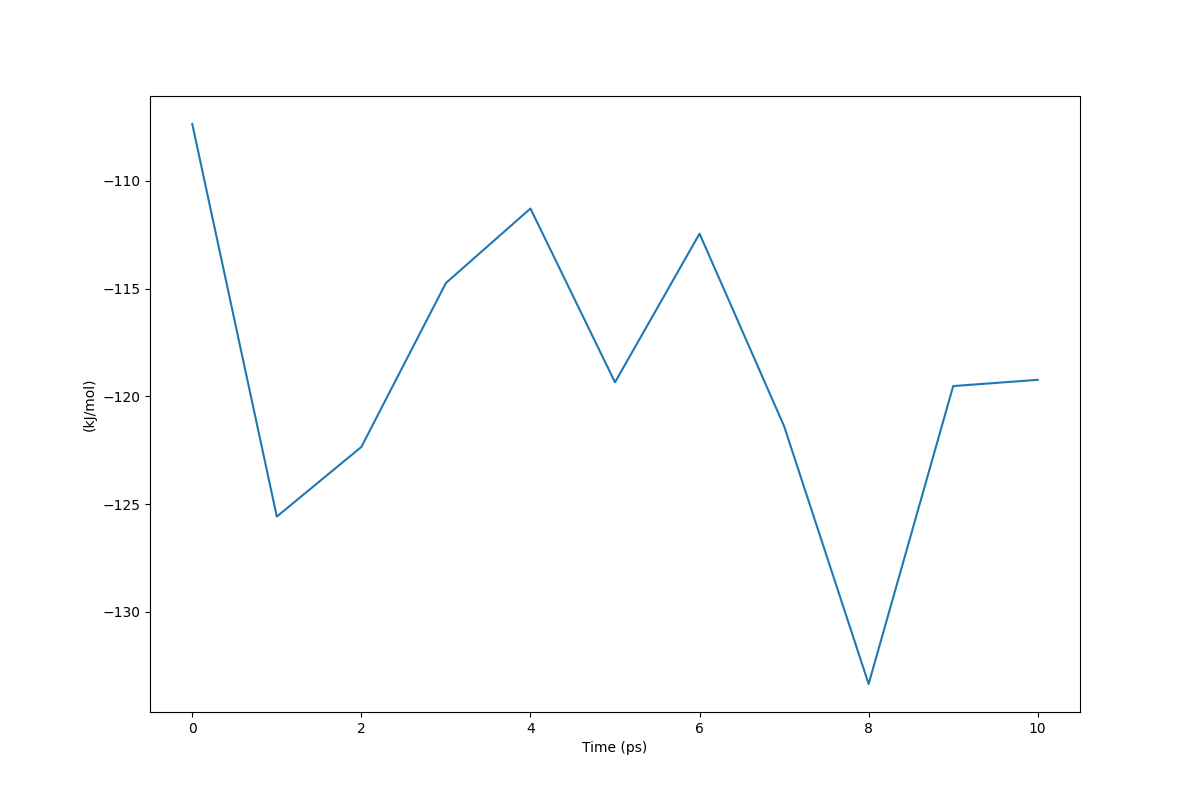

In [28]:
im = Image.open('./npt_prod_ie_ie_sum.png')
im

### リガンドRMSDトラジェクトリの表示

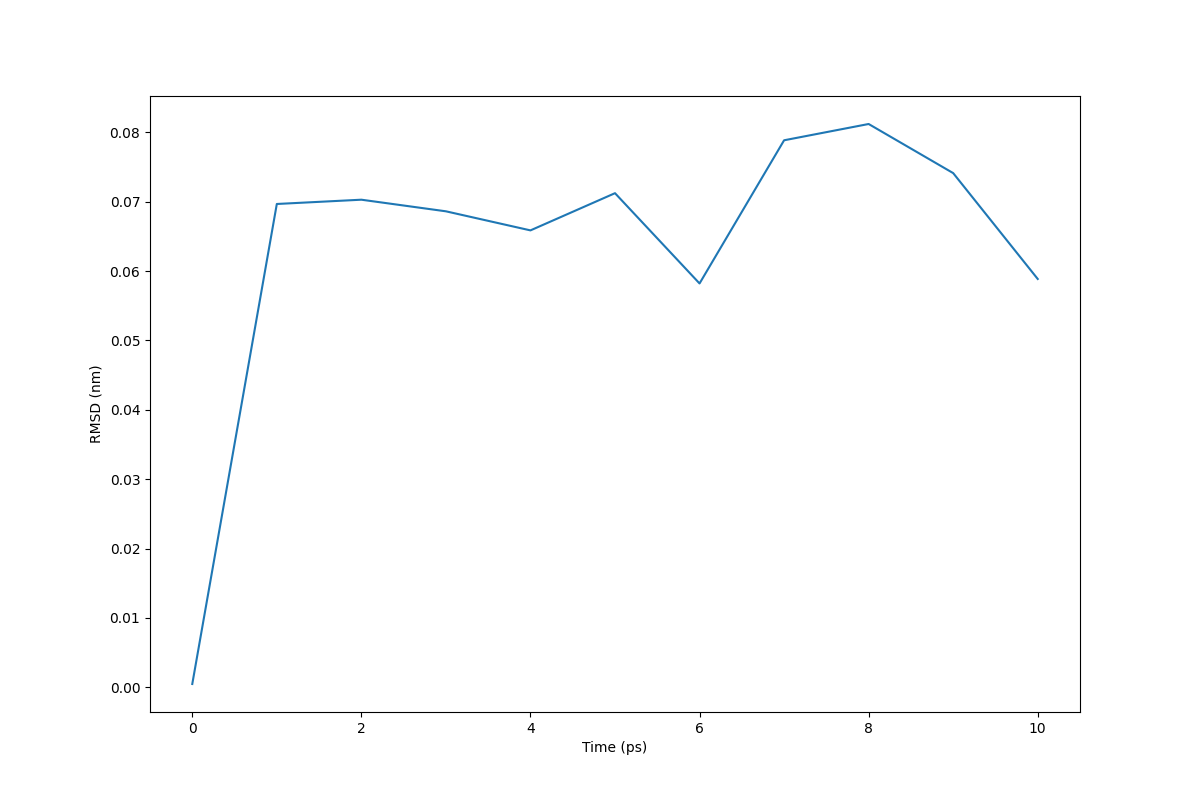

In [29]:
im = Image.open('./npt_prod_nowat_fit_rms.png')
im

### リガンドRMSFの表示

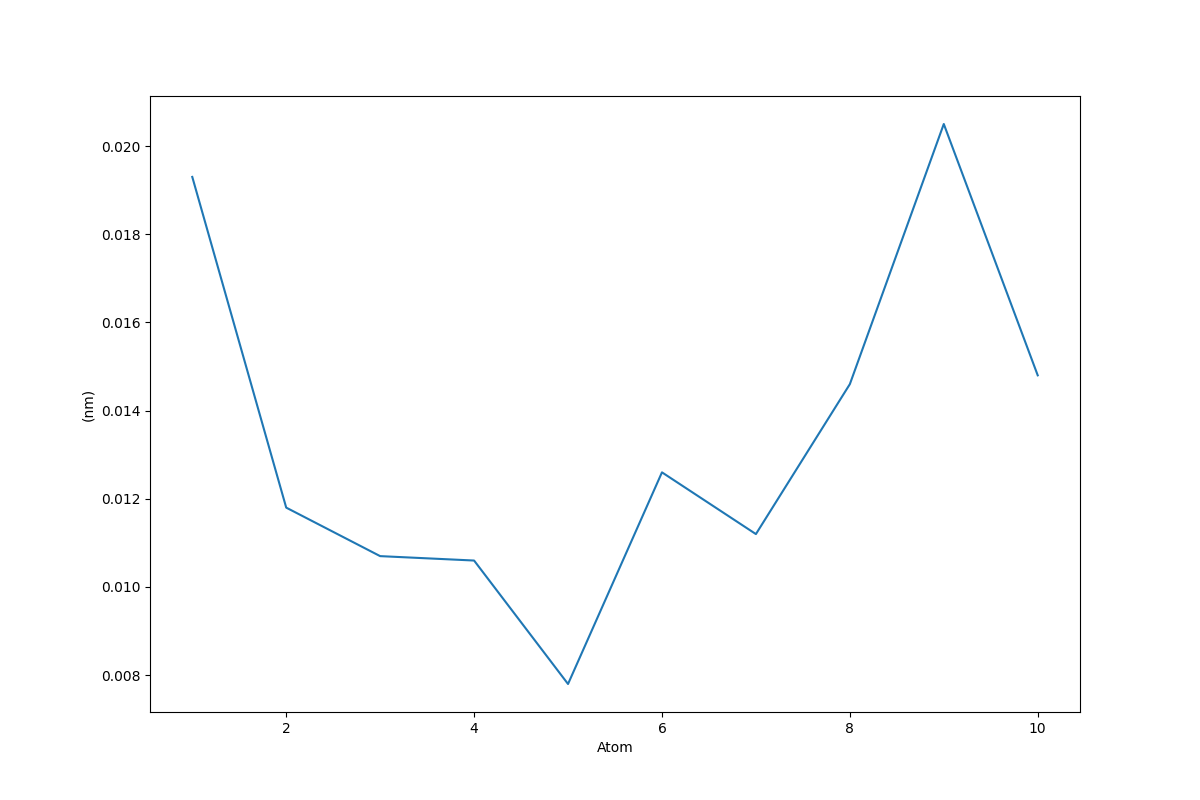

In [30]:
im = Image.open('./npt_prod_nowat_fit_rmsf.png')
im